# Atabay Kadiroglu - CIS9760 - Movie Analysis

In [1]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
actors = spark.read.csv('s3://cis9760-imdb-dataset/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-imdb-dataset/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-imdb-dataset/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-imdb-dataset/title.ratings.tsv', sep=r'\t', header=True)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1650582069388_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Content

**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.
<br/><br/>
**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.

# Actors

In [2]:
actors.printSchema()
actors.show(10)
actors.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0071877,tt01170...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,soun...|tt0077975,tt00725...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0069467,tt00509...|
|nm0000006| Ingr

# Genres

In [3]:
genres.printSchema()
genres.show(2)
genres.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+-----------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|           genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+-----------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|  Animation,Short|
+-------

In [4]:
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres").show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+--------------+-----------------+
|        primaryTitle|startYear|runtimeMinutes|           genres|
+--------------------+---------+--------------+-----------------+
|          Carmencita|     1894|             1|Documentary,Short|
|Le clown et ses c...|     1892|             5|  Animation,Short|
+--------------------+---------+--------------+-----------------+
only showing top 2 rows

In [5]:
from pyspark.sql.functions import col
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres").sort(col("startYear").desc()).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+--------------+-------------------+
|        primaryTitle|startYear|runtimeMinutes|             genres|
+--------------------+---------+--------------+-------------------+
|   '62 Buick Special|       \N|             4|        Music,Short|
|             Call me|       \N|            \N|              Music|
|          The Tailor|       \N|            \N|                 \N|
|                Ozob|       \N|            \N|       Sci-Fi,Short|
|Making of Six: Un...|       \N|            \N|             Horror|
|     Calea Pasarilor|       \N|            \N|              Drama|
|The Archer Connec...|       \N|            \N|              Drama|
|      Ancient Aliens|       \N|            \N|          Adventure|
|            The Tape|       \N|            \N|     Mystery,Sci-Fi|
|   The Second Coming|       \N|            \N|             Horror|
|         A long walk|       \N|            \N|              Music|
|              Dakkar|       \N|            \N| 

In [6]:
from pyspark.sql.functions import col
nll = '\\N'
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres") \
    .filter(col("startYear") != nll) \
    .sort(col("startYear").desc()).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+--------------+--------------------+
|        primaryTitle|startYear|runtimeMinutes|              genres|
+--------------------+---------+--------------+--------------------+
|           100 Years|     2115|            \N|               Drama|
|            Avatar 5|     2027|            \N|Action,Adventure,...|
|     Greenoaks Drive|     2026|            \N|               Drama|
|Untitled Star War...|     2026|            \N|Action,Adventure,...|
|          Persephone|     2026|            \N|             Fantasy|
|Alien Interloper:...|     2026|            \N|           Animation|
|            Avatar 4|     2025|            \N|Action,Adventure,...|
|Ghost Hollow: Ano...|     2025|            \N|        Horror,Short|
| Blood Red Christmas|     2025|            \N|              Horror|
|               Frame|     2025|            \N|         Documentary|
|            The Race|     2024|            \N|               Drama|
|              Anna Q|     2024|  

# Movie Actors

In [7]:
movie_actors.printSchema()
movie_actors.show(10)
movie_actors.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       prod

# Movie Ratings

In [8]:
movie_ratings.printSchema()
movie_ratings.show(2)
movie_ratings.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
+---------+-------------+--------+
only showing top 2 rows

993821

In [9]:
movie_ratings.select("tconst", "averageRating").sort(col("averageRating").desc()).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+
|    tconst|averageRating|
+----------+-------------+
| tt0647375|          9.9|
| tt0626832|          9.9|
| tt0536633|          9.9|
|tt10136092|          9.9|
| tt0500029|          9.9|
| tt9588638|          9.9|
| tt0646493|          9.9|
| tt9738870|          9.9|
| tt0620994|          9.9|
| tt0621905|          9.9|
| tt9914370|          9.9|
| tt9791586|          9.9|
| tt9673280|          9.9|
| tt9867422|          9.9|
| tt0509471|          9.9|
| tt9882156|          9.9|
| tt9712348|          9.9|
| tt9898836|          9.9|
| tt9764360|          9.9|
| tt9901566|          9.9|
+----------+-------------+
only showing top 20 rows

# Install the Libraries

In [10]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
#sc.install_pypi_package("seaborn==0.11.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/d9cfb4410589805cd787f8a82cddd13142d9bf7449d12adf2d05a4a7d633/pyparsing-3.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/75/e1/932e06004039dd670c9d5e1df0cd606bf46e29a28e65d5bb28e894ea29c9/typing_extensions-4.2.0-py3-none-any.whl

In [11]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# What are the 10 most popular genres in this data set?

In [12]:
genres_only = genres.select("tconst", "genres")
movie_ratings_only = movie_ratings.select("tconst", "averageRating")
genres_ratings = genres_only.join(movie_ratings_only, genres_only.tconst == movie_ratings_only.tconst)
genres_ratings.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+---------+-------------+
|   tconst|              genres|   tconst|averageRating|
+---------+--------------------+---------+-------------+
|tt0000028|   Documentary,Short|tt0000028|          5.1|
|tt0000030|   Documentary,Short|tt0000030|          5.2|
|tt0000170|        Comedy,Short|tt0000170|          5.2|
|tt0000172| Comedy,Horror,Short|tt0000172|          6.0|
|tt0000175|   Documentary,Short|tt0000175|          4.9|
|tt0000198|               Short|tt0000198|          4.7|
|tt0000242|Fantasy,Horror,Short|tt0000242|          6.3|
|tt0000271|               Short|tt0000271|          7.3|
|tt0000288|        Comedy,Short|tt0000288|          5.4|
|tt0000302|               Short|tt0000302|          5.2|
+---------+--------------------+---------+-------------+
only showing top 10 rows

In [13]:
from pyspark.sql.functions import explode, split
genres_ratings_exploded = genres_ratings.withColumn('genre',explode(split('genres',",")))
genres_ratings_exploded.show(6)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----------------+---------+-------------+-----------+
|   tconst|           genres|   tconst|averageRating|      genre|
+---------+-----------------+---------+-------------+-----------+
|tt0000028|Documentary,Short|tt0000028|          5.1|Documentary|
|tt0000028|Documentary,Short|tt0000028|          5.1|      Short|
|tt0000030|Documentary,Short|tt0000030|          5.2|Documentary|
|tt0000030|Documentary,Short|tt0000030|          5.2|      Short|
|tt0000170|     Comedy,Short|tt0000170|          5.2|     Comedy|
|tt0000170|     Comedy,Short|tt0000170|          5.2|      Short|
+---------+-----------------+---------+-------------+-----------+
only showing top 6 rows

In [14]:
from pyspark.sql.functions import col, mean
most_pop_genres = genres_ratings_exploded \
    .select("genre", "averageRating") \
    .withColumn("averageRating", col("averageRating").cast("Integer")) \
    .groupBy("genre") \
    .agg(mean('averageRating').alias("avg_rating")) \
    .sort(col("avg_rating").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
most_pop_genres.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|    History| 6.86124801603876|
|Documentary|6.798083249645046|
|    Mystery|6.771227835396454|
|  Biography|6.738967761775409|
|      Crime|6.722250375095637|
|    Western|6.667845303867403|
|    Fantasy|6.651185268084241|
|  Adventure|6.613992750285383|
|  Animation|6.606347768203839|
|        War|6.580771281322196|
+-----------+-----------------+
only showing top 10 rows

# Which genres are most popular in terms of most movies made?

In [16]:
genres_grouped = genres_ratings_exploded.groupby('genre')
genres_grouped.count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|      genre| count|
+-----------+------+
|    Mystery| 44835|
|    Musical| 10506|
|      Sport| 16193|
|     Action|115296|
|  Talk-Show| 32427|
|    Romance| 72082|
|   Thriller| 39781|
|         \N| 20893|
| Reality-TV| 44727|
|     Family| 75740|
|    Fantasy| 39316|
|    History| 23942|
|  Animation|108164|
|  Film-Noir|   778|
|      Short|130006|
|     Sci-Fi| 28672|
|       News| 13694|
|      Drama|324858|
|Documentary|115508|
|    Western| 13575|
+-----------+------+
only showing top 20 rows

In [17]:
barchart_df = genres_grouped.count().orderBy('count',ascending=False)
barchart_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|      genre| count|
+-----------+------+
|      Drama|324858|
|     Comedy|316156|
|      Short|130006|
|Documentary|115508|
|     Action|115296|
|  Animation|108164|
|      Crime|100641|
|  Adventure| 99866|
|     Family| 75740|
|    Romance| 72082|
|      Music| 46286|
|    Mystery| 44835|
| Reality-TV| 44727|
|     Horror| 41350|
|   Thriller| 39781|
|    Fantasy| 39316|
|  Talk-Show| 32427|
|     Sci-Fi| 28672|
|    History| 23942|
|         \N| 20893|
+-----------+------+
only showing top 20 rows

In [18]:
pdf = barchart_df.toPandas()
pdf

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          genre   count
0         Drama  324858
1        Comedy  316156
2         Short  130006
3   Documentary  115508
4        Action  115296
5     Animation  108164
6         Crime  100641
7     Adventure   99866
8        Family   75740
9       Romance   72082
10        Music   46286
11      Mystery   44835
12   Reality-TV   44727
13       Horror   41350
14     Thriller   39781
15      Fantasy   39316
16    Talk-Show   32427
17       Sci-Fi   28672
18      History   23942
19           \N   20893
20    Game-Show   19794
21    Biography   19511
22        Adult   17591
23        Sport   16193
24         News   13694
25      Western   13575
26          War   11254
27      Musical   10506
28    Film-Noir     778

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

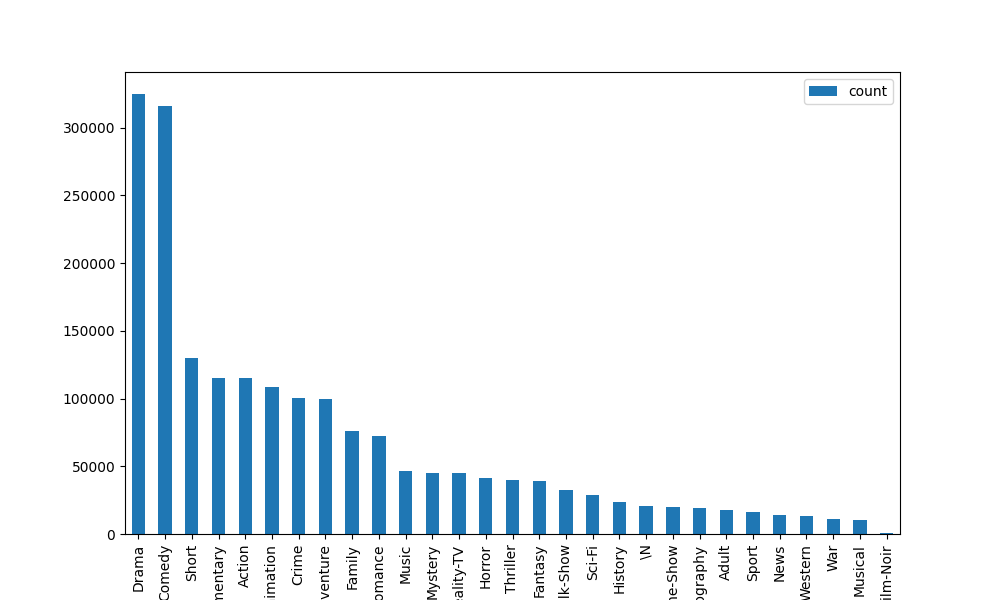

In [19]:
plt.figure(figsize =(10,6))
pdf.plot(kind='bar', x='genre', figsize=(10,6))
%matplot plt

In [20]:
'''
ax = sns.factorplot(x="genre", y="count", data=pdf,size=4, aspect=2, kind="bar")
for axes in ax.axes.flat:
 axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.tight_layout()
plt.show()
%matplot plt
'''

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'\nax = sns.factorplot(x="genre", y="count", data=pdf,size=4, aspect=2, kind="bar")\nfor axes in ax.axes.flat:\n axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment=\'right\')\nplt.tight_layout()\nplt.show()\n%matplot plt\n'

# Find the total number of people who were born in 1980 and whose primary profession is soundtrack

In [21]:
from pyspark.sql.functions import split, col
actors.withColumn('primaryProfession',explode(split('primaryProfession',","))) \
    .filter((actors.primaryProfession == "soundtrack") & (actors.birthYear == '1980')) \
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

41

# What year is the movie "Dead Poets Society" from?

In [22]:
genres.select("startYear") \
    .filter(genres.primaryTitle == "Dead Poets Society") \
    .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|startYear|
+---------+
|     1989|
|     2019|
|     2014|
+---------+

In [23]:
## Oops! Three startYear? Doesn't make sense. Let's look at the data
genres.filter(genres.primaryTitle == "Dead Poets Society") \
    .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+
|    tconst|titleType|      primaryTitle|     originalTitle|isAdult|startYear|endYear|runtimeMinutes|      genres|
+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+
| tt0097165|    movie|Dead Poets Society|Dead Poets Society|      0|     1989|     \N|           128|Comedy,Drama|
|tt10545570|tvEpisode|Dead Poets Society|Dead Poets Society|      0|     2019|     \N|            \N|   Talk-Show|
| tt9037200|tvEpisode|Dead Poets Society|Dead Poets Society|      0|     2014|     \N|            \N|       Music|
+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+

In [24]:
# Seems that there are tv episodes named the same
# Let's do an additional filtering
tmp=genres.select("primaryTitle", "startYear") \
    .filter((genres.primaryTitle == "Dead Poets Society") & (genres.titleType == "movie"))
tmp.show()
tmp.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+---------+
|      primaryTitle|startYear|
+------------------+---------+
|Dead Poets Society|     1989|
+------------------+---------+

1

# Find all the movies featuring "Scarlett Johansson" and "Chris Evans" (2 points)

Hint 1: Join actors, genres, and movie_actors on each other.

Hint 2: You might want to filter the genres DataFrame where the title type is movie.

Note: If you already used knownForTitles from the Actors DataFrame for the movie list and got the same result in my previous notebook, that's also acceptable.

In [25]:
gs = genres.select("tconst", "primaryTitle", "genres", "titleType", "startYear")
mas = movie_actors.select("tconst", "nconst")
acs = actors.select("nconst", "primaryName", "knownForTitles")

gs_mas=gs.join(mas, gs.tconst == mas.tconst).drop(gs.tconst)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
gs_mas_acs = gs_mas.join(acs, gs_mas.nconst == acs.nconst).drop(gs_mas.nconst)
##gs_mas_acs.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
scarlett = gs_mas_acs.select("primaryTitle") \
    .filter((gs_mas_acs.primaryName == "Scarlett Johansson") & (gs_mas_acs.titleType == "movie"))

chris = gs_mas_acs.select("primaryTitle") \
    .filter((gs_mas_acs.primaryName == "Chris Evans") & (gs_mas_acs.titleType == "movie"))

sc_movies = scarlett.join(chris, scarlett.primaryTitle == chris.primaryTitle).drop(scarlett.primaryTitle)
sc_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------+
|primaryTitle                       |
+-----------------------------------+
|Captain America: The Winter Soldier|
|The Perfect Score                  |
|The Avengers Assemble Premiere     |
|The Avengers                       |
|Captain America: Civil War         |
+-----------------------------------+

# Find all the movies featuring "Brad Pitt" after 2010 (2 points)

Hint 1: Join actors, genres, and movie_actors on each other.

Hint 2: You might want to filter where the title type is movie.

Note: If you already used knownForTitles from the Actors DataFrame for the movie list and got the same result in my previous notebook, that's also acceptable.

In [28]:
brad_after_2010 = gs_mas_acs.select("primaryTitle", "startYear") \
                    .filter((gs_mas_acs.primaryName == "Brad Pitt") 
                            & (gs_mas_acs.titleType == "movie")
                           & (gs_mas_acs.startYear > 2010)).sort(col("startYear").desc()).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Kajillionaire                    |2020     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|The King                         |2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Allied                           |2016     |
|Voyage of Time: Life's Journey   |2016     |
|By the Sea                       |2015     |
|The Big Short                    |2015     |
|Hitting the Apex                 |2015     |
|Fury                             |2014     |
|Kick-Ass 2                       |2013     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 |2011     |
|Moneyball                        

# What is the number of movies in which "Emma Stone" acted after 2015? (1 point)

Hint 1: Join actors, genres, and movie_actors on each other.

Hint 2: You might want to filter where the title type is movie.

Hint 3: You can also filter the movies_actor DataFrame where the category is actress. If so, the results might be slightly different.

Note: If you already used knownForTitles from the Actors DataFrame for the movie list and got the same result in my previous notebook, that's also acceptable.

In [29]:
emma_after_2015 = gs_mas_acs.select("primaryTitle", "startYear") \
                    .filter((gs_mas_acs.primaryName == "Emma Stone") 
                            & (gs_mas_acs.titleType == "movie")
                           & (gs_mas_acs.startYear > 2015))
emma_after_2015.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

7

# What is the number of movies acted by "Chris Evans" per year? (3 points)

Hint 1: Join actors, genres, and movie_actors on each other.

Hint 2: You might want to filter where the title type is movie.

Hint 3: Sort the results in a descending order. 

Hint 4: If there is a null value, remove it. 

Hint 5: You can also filter the movies_actor DataFrame where the category is actor. If so, the results might be slightly different.

Note: If you already used knownForTitles from the Actors DataFrame for the movie list and got the same result in my previous notebook, that's also acceptable.

In [30]:
chris_filtered = gs_mas_acs.select("startYear", "primaryTitle") \
                    .filter((gs_mas_acs.primaryName == "Chris Evans") 
                            & (gs_mas_acs.titleType == "movie")
                           & (col("startYear") != nll))

##chris_filtered.sort(col("startYear").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
chris_filtered.groupBy('startYear').count().sort(col("count").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2012|    4|
|     2014|    3|
|     2008|    3|
|     2004|    3|
|     2009|    3|
|     2005|    3|
|     2011|    3|
|     2007|    3|
|     2010|    2|
|     2013|    2|
|     2019|    2|
|     2016|    2|
|     2018|    1|
|     2015|    1|
|     2017|    1|
|     2001|    1|
+---------+-----+

# Find the number of comedy movies whose ratings are greater than or equal to 8.5 and produced after 2018 (2 points)

Hint 1: Join genres on movie_actors.

Hint 2: You might want to filter where the title type is movie.

In [32]:
gree = genres.withColumn('genre', explode(split('genres',",")))
gre = gree.join(movie_ratings, gree.tconst == movie_ratings.tconst)
##gre.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
gre.select('genre').distinct().collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(genre='Mystery'), Row(genre='Musical'), Row(genre='Sport'), Row(genre='Action'), Row(genre='Talk-Show'), Row(genre='Romance'), Row(genre='Thriller'), Row(genre='\\N'), Row(genre='Reality-TV'), Row(genre='Family'), Row(genre='Fantasy'), Row(genre='History'), Row(genre='Animation'), Row(genre='Film-Noir'), Row(genre='Short'), Row(genre='Sci-Fi'), Row(genre='News'), Row(genre='Drama'), Row(genre='Documentary'), Row(genre='Western'), Row(genre='Comedy'), Row(genre='Crime'), Row(genre='War'), Row(genre='Game-Show'), Row(genre='Adult'), Row(genre='Music'), Row(genre='Biography'), Row(genre='Adventure'), Row(genre='Horror')]

In [34]:
gre.select('titleType').distinct().collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(titleType='tvSeries'), Row(titleType='tvMiniSeries'), Row(titleType='movie'), Row(titleType='videoGame'), Row(titleType='tvSpecial'), Row(titleType='video'), Row(titleType='tvMovie'), Row(titleType='tvEpisode'), Row(titleType='tvShort'), Row(titleType='short')]

In [40]:
temp = gre.select("primaryTitle", "startYear", "genre", col("averageRating").cast("float").alias("averageRating"), "titleType") \
                .filter((gre.averageRating >= 8.5)
                            & (gre.startYear != nll)
                           & (gre.startYear > "2018")
                       & (gre.genre == "Comedy")
                       & (gre.titleType == "movie"))
temp.show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------+---------+------+-------------+---------+
|primaryTitle                              |startYear|genre |averageRating|titleType|
+------------------------------------------+---------+------+-------------+---------+
|Angrily Ever After                        |2019     |Comedy|8.7          |movie    |
|O Filme do Bruno Aleixo                   |2019     |Comedy|9.0          |movie    |
|Strastite Abiturientski                   |2019     |Comedy|8.8          |movie    |
|Þorsti                                    |2019     |Comedy|8.6          |movie    |
|Teacher Of The Year                       |2019     |Comedy|8.8          |movie    |
|The Long Streak                           |2019     |Comedy|8.5          |movie    |
|Anak Muda Palsu                           |2019     |Comedy|9.0          |movie    |
|National Theatre Live: Fleabag            |2019     |Comedy|8.7          |movie    |
|Horas Amang: Tiga Bulan untuk Selamanya   |2019     |

In [41]:
temp.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

67